<div class="alert alert-info">
    <h1>Исследование базы данных крупного сервиса для чтения книг по подписке</h1>
</div>

## Описание проекта

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

<div class="alert alert-info">
    <h2><a name="0.0"></a> Оглавление</h2>
</div>

* [0. Описание данных и задачи](#0.)
* [1. Загрузка данных и подготовка их к анализу](#1.)
* [2. Исследовательский анализ данных (EDA)](#2.)
    - [2.1. Подсчет книг которые вышли после 1 января 2000 года](#2.1.)
    - [2.2. Подсчет количества обзоров и средню оценку книги](#2.2.)
    - [2.3. Определение издательства, которое выпустило наибольшее количество книг толще 50стр.](#2.3.)
    - [2.4. Определение автора с самой высокой средней оценкой книг](#2.4.)
    - [2.5. Подсчет среднего количества обзоров от пользователей](#2.5.)
* [3. Вывод](#3.)

<div class="alert alert-info">
    <h2><a name="0."></a> Описание данных и задачи</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

Таблица **books**  
Содержит данные о книгах:  
* **book_id** — идентификатор книги;
* **author_id** — идентификатор автора;
* **title** — название книги;
* **num_pages** — количество страниц;
* **publication_date** — дата публикации книги;
* **publisher_id** — идентификатор издателя.

Таблица **authors**  
Содержит данные об авторах:  
* **author_id** — идентификатор автора;
* **author** — имя автора.

Таблица **publishers**  
Содержит данные об издательствах:  
* **publisher_id** — идентификатор издательства;
* **publisher** — название издательства.

Таблица **ratings**  
Содержит данные о пользовательских оценках книг:  
* **rating_id** — идентификатор оценки;
* **book_id** — идентификатор книги;
* **username** — имя пользователя, оставившего оценку;
* **rating** — оценка книги.

Таблица **reviews**  
Содержит данные о пользовательских обзорах на книги:  
* **review_id** — идентификатор обзора;
* **book_id** — идентификатор книги;
* **username** — имя пользователя, написавшего обзор;
* **text** — текст обзора.

### Задача

#### Провести анализ баз данных и сформулировать ценностное предложение для нового продукта
* Посчитать, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитать количество обзоров и среднюю оценку;
* Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
* Определим автора с самой высокой средней оценкой книг — учитем только книги с 50 и более оценками;
* Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

<div class="alert alert-info">
    <h2><a name="1."></a> 1. Загрузка данных и подготовка их к анализу</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

### Выполним действия для доступа к базе данных

In [2]:
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
db_config['pwd'],
db_config['host'],
db_config['port'],
db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Выкрузим таблицы и присвоим им имена

In [3]:
books = ''' SELECT * FROM books'''
authors = ''' SELECT * FROM authors'''
publ = ''' SELECT * FROM publishers'''
rating = ''' SELECT * FROM ratings'''
reviews = ''' SELECT * FROM reviews'''

### Сделаем функцию для вывода данных по запросу

In [4]:
def b(sql):
    return pd.io.sql.read_sql(sql, con = engine)

<div class="alert alert-info">
    <h2><a name="2."></a> 2. Исследуем таблицы и выведем первые 5 строк</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [5]:
for df in [b(books), b(authors), b(publ), b(rating), b(reviews)]:
    display(df.head(), df.info(), df.duplicated().sum())
    print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
book_id             1000 non-null int64
author_id           1000 non-null int64
title               1000 non-null object
num_pages           1000 non-null int64
publication_date    1000 non-null object
publisher_id        1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


None

0

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
author_id    636 non-null int64
author       636 non-null object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


None

0

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
publisher_id    340 non-null int64
publisher       340 non-null object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


None

0

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
rating_id    6456 non-null int64
book_id      6456 non-null int64
username     6456 non-null object
rating       6456 non-null int64
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


None

0

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
review_id    2793 non-null int64
book_id      2793 non-null int64
username     2793 non-null object
text         2793 non-null object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


None

0

----------------------------------


In [6]:
years = '''select 
title,
publication_date
from books b
order by publication_date desc
'''

In [7]:
b(years)

,title,publication_date
0,A Quick Bite (Argeneau #1),2020-03-31
1,The Art of Loving,2019-08-06
2,Monster,2019-03-05
3,Women,2014-07-29
4,Ham on Rye,2014-07-29
...,...,...
995,Brideshead Revisited,1982-01-30
996,Homage to Catalonia,1980-10-22
997,The Shining,1980-07-01
998,The Philosophy of Andy Warhol (From A to B and...,1977-04-06


В таблицах данные чистые без пропусков и дубликатов. Типы данных в порядке, за исключением даты в таблице `books`.  
Самая старшая книга `A Streetcar Named Desire` 1952 года, самая молодая `A Quick Bite (Argeneau #1)` 2020 года


Изучим какие книги преобладают в каталоге по возрасту.  
Выгрузим табличку в пандас и изменим тип даты.

In [8]:
book = pd.io.sql.read_sql(books, con = engine)
book['publication_date'] = pd.to_datetime(book['publication_date'], format='%Y-%m-%d')
book['publication_year'] = book['publication_date'].astype('datetime64[Y]')

Сгруппируем книги по году выпуска

In [9]:
book_year = book.groupby('publication_year').agg({'book_id': ['count']})
book_year;

Посмотрим на графике как расположились книги по годам выпуска.

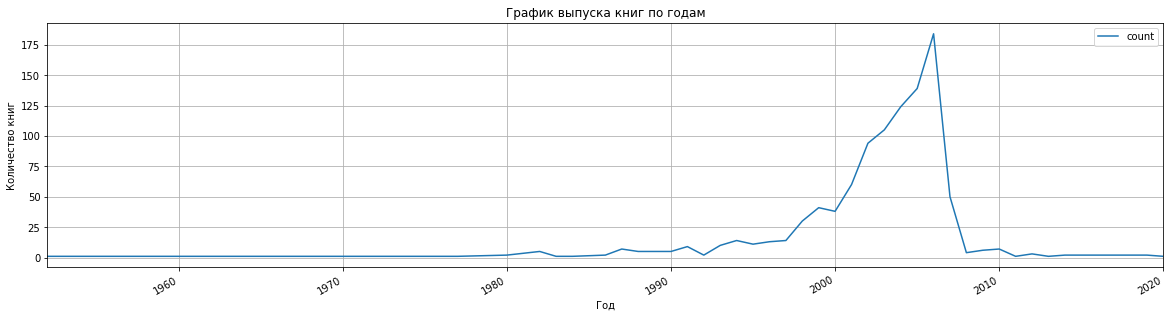

In [10]:
book_year['book_id'].plot(grid=True, style='-', figsize=(20, 5))
plt.xlabel('Год')
plt.ylabel('Количество книг')
plt.title('График выпуска книг по годам')
plt.show()

В каталоге преобладают книги с 1997 по 2007 год. Наибольшее количество книг выпущены в 2006 году - 184 книги.

<div class="alert alert-info">
    <h2><a name="2.1."></a> 2.1. Посчитаем количество книг вышедших после 1 января 2000 года</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [11]:
year = '''select 
count(b.book_id) count_book 
from books b
where b.publication_date >'2000-01-01'
'''

In [12]:
b(year)

,count_book
0,819


Количество книг, которые были опубликованы после 1 января 2000 года, составило 819 штук. 

<div class="alert alert-info">
    <h2><a name="2.2."></a> 2.2. Посчитаем количество обзоров и среднюю оценку</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [13]:
obzor = '''select
t.title,
count(t.title),
round(avg, 2) avg

from

    (select 
    b.book_id,
    b.title,
    avg(ra.rating)

    from books b
    left join ratings ra on b.book_id = ra.book_id

    group by b.book_id) t

left join reviews re on t.book_id = re.book_id

group by t.book_id, t.title, avg
order by count(t.title) desc
limit 10

'''

In [14]:
b(obzor)

,title,count,avg
0,Twilight (Twilight #1),7,3.66
1,The Alchemist,6,3.79
2,Eat Pray Love,6,3.40
3,The Road,6,3.77
4,The Lightning Thief (Percy Jackson and the Oly...,6,4.08
5,The Catcher in the Rye,6,3.83
6,The Curious Incident of the Dog in the Night-Time,6,4.08
7,Water for Elephants,6,3.98
8,The Da Vinci Code (Robert Langdon #2),6,3.83
9,The Glass Castle,6,4.21


Наибольшее количество обзоров у книги `Twilight (Twilight #1)` 7 штук и её средняя оценка 3.66.

Найдем сколько в среднем обзоров в каталоге

In [15]:
obzor_avg = '''
select

avg(count) mean_count_review,
avg(avg) mean_rating

from

    (select
    t.title,
    count(t.title),
    round(avg, 2) avg

    from

        (select 
        b.book_id,
        b.title,
        avg(ra.rating)

        from books b
        left join ratings ra on b.book_id = ra.book_id

        group by b.book_id) t

    left join reviews re on t.book_id = re.book_id

    group by t.book_id, t.title, avg
    order by count(t.title) desc
    ) t
'''

In [16]:
b(obzor_avg)

,mean_count_review,mean_rating
0,2.799,3.89904


Среднее количеств обзоров 2.8 обзора и средний рейтинг 3.9

<div class="alert alert-info">
    <h2><a name="2.3."></a> 2.3. Найдем издательство, которое выпустило наибольшее число книг толще 50 страниц</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [17]:
сount_book = '''select 
distinct(p.publisher),
count(b.title)

from books b
left join publishers p on b.publisher_id = p.publisher_id

where b.num_pages > 50
group by publisher
order by count(b.title) desc
limit 10

'''

In [18]:
b(сount_book)

,publisher,count
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Ballantine Books,19
5,Bantam,19
6,Berkley,17
7,Berkley Books,14
8,St. Martin's Press,14
9,Delta,13


Издательство `Penguin Books` выпустило 42 книги толще 50 листов. 

<div class="alert alert-info">
    <h2><a name="2.4."></a> 2.4. Найдем автора с самой высокой средней оценкой книги - учтем только книги с 50 и более оценками</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [34]:
autor = '''select
a.author,
round(avg(ra.rating),2),
count(b.title)

from books b
left join authors a on b.author_id = a.author_id
left join ratings ra on b.book_id = ra.book_id


where b.book_id in
                    (select 
                    b.book_id
                    from books b

                    left join ratings ra on b.book_id = ra.book_id

                    group by b.book_id
                    having count(ra.rating) > 50) 
group by a.author
order by avg(ra.rating) desc
'''

In [35]:
b(autor)

,author,round,count
0,J.K. Rowling/Mary GrandPré,4.29,310
1,Markus Zusak/Cao Xuân Việt Khương,4.26,53
2,J.R.R. Tolkien,4.25,162
3,Louisa May Alcott,4.19,52
4,Rick Riordan,4.08,62
5,William Golding,3.90,71
6,J.D. Salinger,3.83,86
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.79,57
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.79,66
9,Lois Lowry,3.75,56


Автор J.K. Rowling/Mary GrandPré имеет самую высокую среднию оценку книг в 4.29, с учетом только книг с 50 и более оценками. В каталоге есть 310 книг этого автора.

<div class="alert alert-info">
    <h2><a name="2.5."></a> 2.5. Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [21]:
count_ = '''select
round(avg(count),1) avg

from
    (select 

    count(re.review_id)

    from reviews re

    where re.username in (

                        select ra.username
                        from ratings ra
                        group by ra.username
                        having count(rating_id)>50
    )
group by re.username) t
'''

In [22]:
b(count_)

,avg
0,24.3


Среднее количестово обзоров от пользователей, которые поставили больше 50 оценок составило - 24 обзора.

<div class="alert alert-info">
    <h2><a name="3."></a> 3. Вывод</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

Изучив данные можно сказать, что книги довольно старые. Основное количество книг датированы с 1997 по 2007 год, т.е. им от 20 до 13 лет, что может быть не интересно читателям.  
Можно дополнительно изучить какие книги пользуются наибольшим спросом и имеют наибольшее кличество оценок и отзывов.  

- В базе книг, которые вышли после 1 января 2000 года 819 штук, а это 82% от всех книг.
- Количество обзоров на книги не большое, максимум 7 обзоров, в среднем 2.8 обзора. Средний рейтинг 3.8, что довольно неплохо. Обзоров мало, а книги в основном интересны читателям.
- Наибольшее количество книг выпустило издательство **Penguin Books** - 42 книги. На втором месте - **Vintage** - 31 книга. На третьем **Grand Central Publishing** - 25 книг. На четвертом месте опять издательство **Penguin** только **Classics** и 24 книги. Топ 3 издательств занимают 9,8% от общего количества книг.
- Автор **J.K. Rowling/Mary GrandPré** имеет самую высокую среднию оценку книг в 4.29. В каталоге есть 310 книг этого автора.
- Среднее количество обзоров от пользователей, которые поставили более 50 оценок равно 24.